# Hello, pytorch

![img](https://pytorch.org/tutorials/_static/pytorch-logo-dark.svg)

__This notebook__ will teach you to use pytorch low-level core. You can install it [here](http://pytorch.org/). For high-level interface see the next notebook.

__Pytorch feels__ differently than tensorflow/theano on almost every level. TensorFlow makes your code live in two "worlds" simultaneously:  symbolic graphs and actual tensors. First you declare a symbolic "recipe" of how to get from inputs to outputs, then feed it with actual minibatches of data.  In pytorch, __there's only one world__: all tensors have a numeric value.

You compute outputs on the fly without pre-declaring anything. The code looks exactly as in pure numpy with one exception: pytorch computes gradients for you. And can run stuff on GPU. And has a number of pre-implemented building blocks for your neural nets. [And a few more things.](https://medium.com/towards-data-science/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b)

And now we finally shut up and let pytorch do the talking.

In [1]:
# if running in colab, execute this:
# !wget https://raw.githubusercontent.com/yandexdataschool/Practical_DL/fall19/week02_autodiff/notmnist.py -O notmnist.py
# !pip3 install torch==1.0.0 torchvision

from __future__ import print_function
import numpy as np
import torch
print(torch.__version__)

1.10.1


In [2]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x, x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x, axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [3]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n%s" % torch.matmul(x, x.transpose(1, 0)))  # short: x.mm(x.t())
print("mean over cols :\n%s" % torch.mean(x, dim=-1))
print("cumsum of cols :\n%s" % torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy and Pytorch

As you can notice, pytorch allows you to hack stuff much the same way you did with numpy. No graph declaration, no placeholders, no sessions. This means that you can _see the numeric value of any tensor at any moment of time_. Debugging such code can be done with by printing tensors or using any debug tool you want (e.g. [gdb](https://wiki.python.org/moin/DebuggingWithGdb)).

You could also notice the a few new method names and a different API. So no, there's no compatibility with numpy [yet](https://github.com/pytorch/pytorch/issues/2228) and yes, you'll have to memorize all the names again. Get excited!

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

For example, 
* If something takes a list/tuple of axes in numpy, you can expect it to take *args in pytorch
 * `x.reshape([1,2,8]) -> x.view(1,2,8)`
* You should swap _axis_ for _dim_ in operations like mean or cumsum
 * `x.sum(axis=-1) -> x.sum(dim=-1)`
* most mathematical operations are the same, but types an shaping is different
 * `x.astype('int64') -> x.type(torch.LongTensor)`

To help you acclimatize, there's a [table](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) covering most new things. There's also a neat [documentation page](http://pytorch.org/docs/master/).

Finally, if you're stuck with a technical problem, we recommend searching [pytorch forumns](https://discuss.pytorch.org/). Or just googling, which usually works just as efficiently. 

If you feel like you almost give up, remember two things: __GPU__ an __free gradients__. Besides you can always jump back to numpy with x.numpy()

### Warmup: trigonometric knotwork
_inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

There are some simple mathematical functions with cool plots. For one, consider this:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


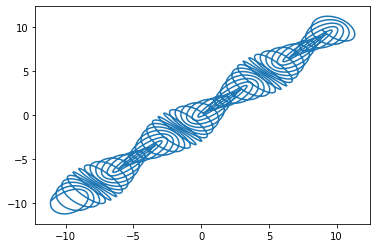

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(-10, 10, steps=10000)

# compute x(t) and y(t) as defined above
x =  t - 1.5 * torch.cos(15 * t)
y =  t - 1.5 * torch.sin(16 * t)

plt.plot(x.numpy(), y.numpy())

if you're done early, try adjusting the formula and seing how  it affects the function

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


## Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)
* Define some differentiable `loss = arbitrary_function(a)`
* Call `loss.backward()`
* Gradients are now available as ```a.grads```

__Here's an example:__ let's fit a linear regression on Boston house prices

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets inclu

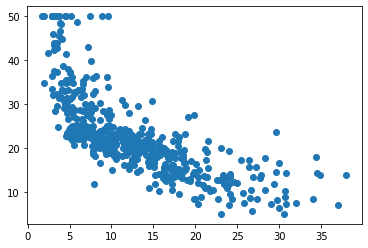

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

In [7]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [8]:
y_pred = w * x + b
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

The gradients are now stored in `.grad` of those variables that require them.

In [10]:
print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-47.3514])
dL/db = 
 tensor([-45.0656])


If you compute gradient from multiple losses, the gradients will add up at variables, therefore it's useful to __zero the gradients__ between iteratons.

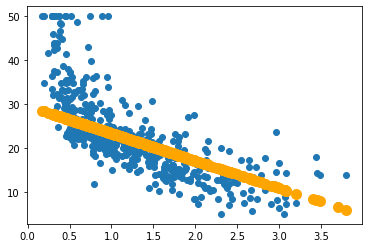

loss =  44.59417


In [11]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    w.data -= 0.05 * w.grad.data
    b.data -= 0.05 * b.grad.data

    # zero gradients
    w.grad.data.zero_()
    b.grad.data.zero_()

    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

__Bonus quest__: try implementing and writing some nonlinear regression. You can try quadratic features or some trigonometry, or a simple neural network. The only difference is that now you have more variables and a more complicated `y_pred`. 

# High-level pytorch

So far we've been dealing with low-level torch API. While it's absolutely vital for any custom losses or layers, building large neura nets in it is a bit clumsy.

Luckily, there's also a high-level torch interface with a pre-defined layers, activations and training algorithms. 

We'll cover them as we go through a simple image recognition problem: classifying letters into __"A"__ vs __"B"__.


In [12]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print("Train size = %i, test_size = %i" % (len(X_train), len(X_test)))

--2022-03-26 15:49:15--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
Распознаётся yaroslavvb.com (yaroslavvb.com)… 129.121.4.193
Подключение к yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 8458043 (8,1M) [application/x-gzip]
Сохранение в: «notMNIST_small.tar.gz»

     0K .......... .......... .......... .......... ..........  0%  131K 63s
    50K .......... .......... .......... .......... ..........  1%  131K 62s
   100K .......... .......... .......... .......... ..........  1% 16,6M 41s
   150K .......... .......... .......... .......... ..........  2% 3,31M 31s
   200K .......... .......... .......... .......... ..........  3%  258K 31s
   250K .......... .......... .......... .......... ..........  3%  260K 31s
   300K .......... .......... .......... .......... ..........  4%  266K 31s
   350K .......... .......... .......... .......... ..........  4% 4,06M 27s
   400K .......... 

  5100K .......... .......... .......... .......... .......... 62%  171K 11s
  5150K .......... .......... .......... .......... .......... 62%  226K 11s
  5200K .......... .......... .......... .......... .......... 63%  233K 11s
  5250K .......... .......... .......... .......... .......... 64%  208K 10s
  5300K .......... .......... .......... .......... .......... 64%  169K 10s
  5350K .......... .......... .......... .......... .......... 65%  232K 10s
  5400K .......... .......... .......... .......... .......... 65%  197K 10s
  5450K .......... .......... .......... .......... .......... 66%  153K 10s
  5500K .......... .......... .......... .......... .......... 67%  208K 10s
  5550K .......... .......... .......... .......... .......... 67%  152K 10s
  5600K .......... .......... .......... .......... .......... 68%  204K 10s
  5650K .......... .......... .......... .......... .......... 69%  135K 9s
  5700K .......... .......... .......... .......... .......... 69%  144K 9s
 

Extracting ...



x notMNIST_small/J/Q2hlbHRlbmhhbS1Cb29rQ29uZEl0YWxpYy5vdGY=.png
x notMNIST_small/J/QnJ1aG5TY3JpcHQtU3RyYWlnaHRlbmVkLm90Zg==.png
x notMNIST_small/J/R2FydG9uIFJlZ3VsYXIgRXgudHRm.png
x notMNIST_small/J/QXZhbG9uLm90Zg==.png
x notMNIST_small/J/RkZGIEludGVyZmFjZTAxYi50dGY=.png
x notMNIST_small/J/R3JlZWsgSXRhbGljLnR0Zg==.png
x notMNIST_small/J/R2lsbCBTYW5zIE1ULnR0Zg==.png
x notMNIST_small/J/QW5Ba3JvbmlzbS50dGY=.png
x notMNIST_small/J/RGlkb3QtSFRGLU0wNi1NZWRpdW0ub3Rm.png
x notMNIST_small/J/QmVuZ3VpYXRJdGNURUUgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/J/SGVhZGxpbmUgQ29uZGVuc2VkIE5vcm1hbC50dGY=.png
x notMNIST_small/J/Q2FzbG9uQm9va0JFLUJvbGRPc0Yub3Rm.png
x notMNIST_small/J/OC1iaXQgTGltaXQgTyBCUksudHRm.png
x notMNIST_small/J/R3JlY28gVGVuIE9sZFN0eWxlIFNTaSBOb3JtYWwudHRm.png
x notMNIST_small/J/Q29uY3Vyc29JdGFsaWFuIEJUTiBCb2xkLnR0Zg==.png
x notMNIST_small/J/Q2h1cmNod2FyZEJydURSZWcudHRm.png
x notMNIST_small/J/R291ZHkgT2xkIFN0eWxlIEl0YWxpYyBCVC50dGY=.png
x notMNIST_small/J/R2hvdWx5Qm9vbHkudHRm.png
x n

x notMNIST_small/J/RGlkb3RMSC1Sb21hblNDLm90Zg==.png
x notMNIST_small/J/QW5uYSBJQ0cudHRm.png
x notMNIST_small/J/Q29iYWx0IE5vcm1hbC50dGY=.png
x notMNIST_small/J/R2FyYW1vbmRFRi1Cb2xkLm90Zg==.png
x notMNIST_small/J/RWd5cHRpZW5uZUYtQm9sZC5vdGY=.png
x notMNIST_small/J/QWxpeDIudHRm.png
x notMNIST_small/J/SG9ybGV5IE9TIE1UIEl0YWxpYy50dGY=.png
x notMNIST_small/J/RWxlbWVudGFTeW1ib2wtSXRhbGljLm90Zg==.png
x notMNIST_small/J/Q2hvcmQtQmxhY2sub3Rm.png
x notMNIST_small/J/Q2hlbHRlbmhtIEJUIEl0YWxpYy50dGY=.png
x notMNIST_small/J/QW1lcmljYW5UeXBlQm9sZC5vdGY=.png
x notMNIST_small/J/RGVtb3R0ZSBCb2xkLnR0Zg==.png
x notMNIST_small/J/Q2hpc2VsIFRoaW4gQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/J/SGVsdmV0aWNhUm91bmRlZExULUJvbGRDb25kT2JsLm90Zg==.png
x notMNIST_small/J/RnJlbmNoIDExMS5wZmI=.png
x notMNIST_small/J/RGFudGVNVFN0ZC1JdGFsaWMub3Rm.png
x notMNIST_small/J/QWR2ZW50dXJlciBMaWdodCBTRi50dGY=.png
x notMNIST_small/J/QmFzZU5pbmVTQ0IudHRm.png
x notMNIST_small/J/RkZGIFByb3RlZ2UgRXh0ZW5kZWQudHRm.png
x notMNIST_small/J/Q

x notMNIST_small/J/QW1UeXBld3JpdGVyRUYtTGlnaHQub3Rm.png
x notMNIST_small/J/Q292aW5ndG9uIFNoYWRvdyBJdGFsaWMudHRm.png
x notMNIST_small/J/Qm9kb25pRUYtRGVtaUJvbGQub3Rm.png
x notMNIST_small/J/RmVuaWNlRXhwZXJ0QlEtUmVndWxhci5vdGY=.png
x notMNIST_small/J/QW5uYWJlbGxlIEpGLnR0Zg==.png
x notMNIST_small/J/QmVuZ3VpYXRHb3RoaWNCUS1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/J/Rm91bHRvbi50dGY=.png
x notMNIST_small/J/Q3VzaGluZ0Jvb2tJdGFsaWMub3Rm.png
x notMNIST_small/J/QnJhbmRpbmcgSXJvbi50dGY=.png
x notMNIST_small/J/Rm9ybWFsNDM2IEJULnR0Zg==.png
x notMNIST_small/J/SGlzdG9yeSBSZXBlYXRpbmcgVmVydGljYWwudHRm.png
x notMNIST_small/J/SGVsdmV0aWNhLUNvbmRlbnNlZC1PYmxpcXVlLm90Zg==.png
x notMNIST_small/J/QXJydXNPU0ZCVC1Sb21hbi5vdGY=.png
x notMNIST_small/J/RnJhbmtsaW5Hb3RoaWNMVC1EZW1pQ25kLm90Zg==.png
x notMNIST_small/J/Q2VudHVyeS1TY2hvb2xib29rLU5vcm1hbC50dGY=.png
x notMNIST_small/J/SGVhZGxpbmUgVGhpbiBJdGFsaWMudHRm.png
x notMNIST_small/J/QmVhY2ggVGhpbiBCb2xkLnR0Zg==.png
x notMNIST_small/J/RXZhbmdlbGljQm9sZC5vdGY=.png


x notMNIST_small/E/Q2FzdG9yZ2F0ZSAtIFJvdWdoLnR0Zg==.png
x notMNIST_small/E/QmFzcXVlIFRoaW4gTm9ybWFsLnR0Zg==.png
x notMNIST_small/E/RWxlY3RyaWMgR29hdC50dGY=.png
x notMNIST_small/E/QmFpbGV5IFNhbnMgSVRDIEJvb2sudHRm.png
x notMNIST_small/E/Qm9yem9pIE1lZGl1bS50dGY=.png
x notMNIST_small/E/Q2VudHVyeVNjaG9vbC5vdGY=.png
x notMNIST_small/E/QUxFWDIub3Rm.png
x notMNIST_small/E/SHVtYnVja2VyIE5hc3R5LnR0Zg==.png
x notMNIST_small/E/RnVqaSBUaGluIEl0YWxpYy50dGY=.png
x notMNIST_small/E/QXJub3ZhSVRDIFRULnR0Zg==.png
x notMNIST_small/E/RnV0dXJhSUNHLUJvbGQub3Rm.png
x notMNIST_small/E/Qm91Z2FuIFNTaSBTZW1pIEJvbGQudHRm.png
x notMNIST_small/E/RHluYW1vRHhjRFhDLm90Zg==.png
x notMNIST_small/E/RGF2aWxsZSBDb25kZW5zZWQgU2xhbnRlZC50dGY=.png
x notMNIST_small/E/QXJyaWJhQXJyaWJhU3RkLm90Zg==.png
x notMNIST_small/E/RnJlaWdodEJpZ0JvbGRJdGFsaWMudHRm.png
x notMNIST_small/E/RnJhbmsgSXRhbGljLnR0Zg==.png
x notMNIST_small/E/QWdmYVdpbGVSb21hblN0ZC1Cb2xkLm90Zg==.png
x notMNIST_small/E/QmxhZGVDdXRUaHJ1LnR0Zg==.png
x notMNIST_small/E/Q

x notMNIST_small/E/SHVtYW5zdDUzMSBCVCBCb2xkLnR0Zg==.png
x notMNIST_small/E/QXRoZW5hZXVtU3RkLUJvbGQub3Rm.png
x notMNIST_small/E/Q2hlbHRlbmhtIEJUIFJvbWFuLnR0Zg==.png
x notMNIST_small/E/RXBweSBFdmFucyBSb3VuZC50dGY=.png
x notMNIST_small/E/R2FzY29nbmUtWGxpZ2h0Lm90Zg==.png
x notMNIST_small/E/Q2hlbHRlbmhtIEJUIEJvbGQudHRm.png
x notMNIST_small/E/R2FyYW1vbmRIYW5kdG9vbGVkSVRDU3RkLm90Zg==.png
x notMNIST_small/E/Q29tcGFjdGFFRi1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/E/Q29uY3Vyc29Nb2Rlcm5lIEJUTiBXaWRlIE9ibGlxdWUudHRm.png
x notMNIST_small/E/RGVsdGFCUS1Cb29rLm90Zg==.png
x notMNIST_small/E/RGFudGVNVFN0ZC1NZWRpdW1JdGFsaWMub3Rm.png
x notMNIST_small/E/QmVydGhhbUJvbGQudHRm.png
x notMNIST_small/E/QnJpb3NvUHJvLUJvbGRJdERpc3Aub3Rm.png
x notMNIST_small/E/Q291cmllciAxMCBQaXRjaCBJdGFsaWMucGZi.png
x notMNIST_small/E/QXV0bzItSXRhbGljLnR0Zg==.png
x notMNIST_small/E/QXRtb3NwaGVyZUlUQ1N0ZC5vdGY=.png
x notMNIST_small/E/Rm9ybWF0YS1JdGFsaWNTQy5vdGY=.png
x notMNIST_small/E/RGlhbWFudGVFRi1SZWd1bGFySXRhbGljLm90Zg==.png


x notMNIST_small/I/RXJhc0JRLUxpZ2h0Lm90Zg==.png
x notMNIST_small/I/QW1wbGl0dWRlQ29tcC1MaWdodC50dGY=.png
x notMNIST_small/I/R290aGljQmxvbmQtU2xpbS5vdGY=.png
x notMNIST_small/I/QnJpZW1TY3JpcHRTdGQtQmxhY2sub3Rm.png
x notMNIST_small/I/RGF2aWRhIEJvbGQgQlQudHRm.png
x notMNIST_small/I/R2FtbWFFRi1CbGFja0l0YWxpYy5vdGY=.png
x notMNIST_small/I/RFRMUGFyYWRveFRDYXBzLU1lZGl1bS5vdGY=.png
x notMNIST_small/I/SHVtYW5pc3QgNTIxIEJvbGQgQ29uZGVuc2VkIEJULnR0Zg==.png
x notMNIST_small/I/Q2Fybml2YWwub3Rm.png
x notMNIST_small/I/Rm9ybWF0YUJRLU1lZGl1bS5vdGY=.png
x notMNIST_small/I/QmVhdSBUaGluIEl0YWxpYy50dGY=.png
x notMNIST_small/I/SHVtYW5hIEV4LnR0Zg==.png
x notMNIST_small/I/QUdhcmFtb25kLUJvbGQub3Rm.png
x notMNIST_small/I/SVRDIFRpZmZhbnkgTWVkaXVtLnBmYg==.png
x notMNIST_small/I/QmVya2VsZXkgT2xkc3R5bGUgSXRhbGljLnR0Zg==.png
x notMNIST_small/I/RnJhbmtUaW1lcy1JdGFsaWMudHRm.png
x notMNIST_small/I/R2FyYW1vbmQgSXRjIFQgRUUgQm9sZCBDb25kZW5zZWQucGZi.png
x notMNIST_small/I/R291ZHlDYXRhbG9ndWVFRi1SZWd1bGFyLm90Zg==.png
x notMNI

x notMNIST_small/I/RGlhbWFudGUtQm9sZC5vdGY=.png
x notMNIST_small/I/QmFsbGFudGluZXMtRGVtaUJvbGQub3Rm.png
x notMNIST_small/I/Q2FuZHkgU3RyaXBlIChCUkspLnR0Zg==.png
x notMNIST_small/I/QW5nZWwgRm9udC50dGY=.png
x notMNIST_small/I/R2xhc2VyU3RlRC50dGY=.png
x notMNIST_small/I/QWF1eCBQcm9UaGluIE9TRi50dGY=.png
x notMNIST_small/I/Q2VudHVyeSBTY2hvb2xib29rIEdyZWVrIEluY2xpbmVkIEJULnR0Zg==.png
x notMNIST_small/I/RXBpYyBOb3JtYWwudHRm.png
x notMNIST_small/I/RGVsdGEtQm9va0l0YWxpYy5vdGY=.png
x notMNIST_small/I/R290aGljIDcyNSBCb2xkIEJULnR0Zg==.png
x notMNIST_small/I/QWdlbmRhLUxpZ2h0RXh0cmFDb25kZW5zZWQub3Rm.png
x notMNIST_small/I/Q2FuZGlkYUJULUl0YWxpYy5vdGY=.png
x notMNIST_small/I/Q2hvcmVhIERpc3BsYXkgU1NpIEJsYWNrLnR0Zg==.png
x notMNIST_small/I/Q0NXaWxkV29yZHMtQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small/I/Q2FycmVOb2lyU3RkLUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/I/RHVwdXlIZWF2eSBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/I/SVRDLUJlcmtlbGV5LU9sZC1TdHlsZS1CbGFjay5vdGY=.png
x notMNIST_small/I/Rm9sa3NCbGFjay50dGY=.png


x notMNIST_small/I/Q29uY3Vyc29Nb2Rlcm5lIEJUTiBMdC50dGY=.png
x notMNIST_small/I/RmxvcmlhdGVkIEdpbGwudHRm.png
x notMNIST_small/I/Q291cmllci1Cb2xkT2JsaXF1ZS5vdGY=.png
x notMNIST_small/I/QXV0b21hdGljUmVndWxhckV4cGVydC5vdGY=.png
x notMNIST_small/I/Qm9kb25pIFN2dHlUd28gSVRDIFRUIEJvbGQudHRm.png
x notMNIST_small/I/QmF1aGF1c0l0Y1RFRU1lZC50dGY=.png
x notMNIST_small/I/SVRDIFRpZXBvbG8gQmxhY2sgSXRhbGljLnBmYg==.png
x notMNIST_small/I/Q2xpY2hlZUNFLU9ibGlxdWUub3Rm.png
x notMNIST_small/I/RnJhbmtsaW5Hb3RoaWMtRGVtaUNuZC5vdGY=.png
x notMNIST_small/I/Q2hlbmdhbHVsdS5vdGY=.png
x notMNIST_small/I/QW1lcmV0dG8gV2lkZSBCb2xkLnR0Zg==.png
x notMNIST_small/I/QXZhbnRHYXJkZUlUQy1Cb29rT2JsaXF1ZS5vdGY=.png
x notMNIST_small/I/Q29wcGVycGxhdGUudHRm.png
x notMNIST_small/I/Q29tcGFjdGFFRi1MaWdodC5vdGY=.png
x notMNIST_small/I/Q2xlYXJmYWNlR290aGljTFQtQmxhY2sub3Rm.png
x notMNIST_small/I/QmVsbGhvcE5GLnR0Zg==.png
x notMNIST_small/I/RnJlZXplciBCVE4gQ29uZGVuc2VkIE9ibGlxdWUudHRm.png
x notMNIST_small/I/R2FyYW1vbmRQcmVtclByby1NZWRTdWJoL

x notMNIST_small/A/R29yZ2lvIFdpZGUgSXRhbGljLnR0Zg==.png
x notMNIST_small/A/Q3VydmF0dXJlLVJvdW5kZWRJdGFsaWMub3Rm.png
x notMNIST_small/A/R3JhbnRoYW1TaGFkb3cudHRm.png
x notMNIST_small/A/SGVsdmV0aWNhLUJsYWNrT2JsaXF1ZS5vdGY=.png
x notMNIST_small/A/Q3JpY2tldC50dGY=.png
x notMNIST_small/A/QmFza2VydmlsbGUgQmxhY2sgU1NpIEJvbGQgSXRhbGljLnR0Zg==.png
x notMNIST_small/A/RFRMVmFuZGVuS2VlcmVTRC1JdGFsaWMub3Rm.png
x notMNIST_small/A/Q2hvZGEudHRm.png
x notMNIST_small/A/RWdpemlvLUJsZC5vdGY=.png
x notMNIST_small/A/QXJpYWwgQ0UgQm9sZC50dGY=.png
x notMNIST_small/A/Q2VudHVyeUlUQ0JRLUxpZ2h0Lm90Zg==.png
x notMNIST_small/A/RHJhZ29uLUJvbGRJdGEub3Rm.png
x notMNIST_small/A/Q2FsdmVydCBNVCBMaWdodC50dGY=.png
x notMNIST_small/A/Q29udGludXVtIEJvbGQudHRm.png
x notMNIST_small/A/QnJ1c2hCUS5vdGY=.png
x notMNIST_small/A/Q2VudHVyeUlUQ0NvbmRlbnNlZEJRLUJvb2sub3Rm.png
x notMNIST_small/A/Q2hpYW50aSBHWCBCVC50dGY=.png
x notMNIST_small/A/RGVWaW5uZUJULUl0YWxpY0FsdC50dGY=.png
x notMNIST_small/A/QXZlbmlyIDQ1IEJvb2sgT2JsaXF1ZS5wZmI=.png


x notMNIST_small/A/Rm9ybWF0aW9uIFNlbWlCb2xkLnR0Zg==.png
x notMNIST_small/A/Rm9saW8gWEJkIEJUIEV4dHJhIEJvbGQudHRm.png
x notMNIST_small/A/STJ0cmlndW5NYXhpbXVtIEUudHRm.png
x notMNIST_small/A/RnJhbmtSdWVobCgxKS50dGY=.png
x notMNIST_small/A/Qm9kb25pLUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/A/SVRDRnJhbmtsaW5Hb3RoaWNTdGQtQm9va0l0Lm90Zg==.png
x notMNIST_small/A/RmFjc2ltaWxlZEl0YWxpYy5vdGY=.png
x notMNIST_small/A/QXJpYWxNVFN0ZC1MaWdodEl0YWxpYy5vdGY=.png
x notMNIST_small/A/SGVsdmV0aWNhTmV1ZS1UaGluLm90Zg==.png
x notMNIST_small/A/SGFuZGVsR290RC1MaWdoLm90Zg==.png
x notMNIST_small/A/QmVydGhvbGQgQWt6aWRlbnogR3JvdGVzayBCRSBFeHRlbmRlZC5wZmI=.png
x notMNIST_small/A/Q29uY29yZGVFeHBlcnRCUS1NZWRpdW0ub3Rm.png
x notMNIST_small/A/QWRsZXIudHRm.png
x notMNIST_small/A/QUplbnNvblByby1Cb2xkLm90Zg==.png
x notMNIST_small/A/RHVlIERhdGUudHRm.png
x notMNIST_small/A/RnV0dXJhRUYtTWVkaXVtT2JsLm90Zg==.png
x notMNIST_small/A/Q2VudHVyeU9TTVRTdGQtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/A/RFRMUGFyYWRveFRDYXBzLUJvbGQub3Rm.png


x notMNIST_small/A/QnJ1c2ggNDQ1IEJULnR0Zg==.png
x notMNIST_small/A/QUdCdWNoUm91bmRlZEJRLUJvbGRPdXRsaW5lLm90Zg==.png
x notMNIST_small/A/QnJhbmRvIENvbmRlbnNlZCBOb3JtYWwudHRm.png
x notMNIST_small/A/SElBSVJQT1JUREVQQVJUVVJFLnR0Zg==.png
x notMNIST_small/A/QWxiZXJ0YSBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/A/QW1hbmRhc0hhbmQgUmVndWxhci50dGY=.png
x notMNIST_small/A/Qm9kb25pREJsYS50dGY=.png
x notMNIST_small/A/Q2FlY2lsaWEtTGlnaHRJdGFsaWMub3Rm.png
x notMNIST_small/A/RnV0dXJhIEJvb2sucGZi.png
x notMNIST_small/A/RGlzdHJvIFZpbnlsLnR0Zg==.png
x notMNIST_small/A/RmVsdGhnb3RoaWMtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/A/RGVsdGEtTWVkaXVtLm90Zg==.png
x notMNIST_small/A/QWRvYmVBcmFiaWMtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/A/Q29jYWluZSBTYW5zLnR0Zg==.png
x notMNIST_small/A/QnVuZHkgWWVsbG93IEhvbGxvd1NoYWRvd2VkLnR0Zg==.png
x notMNIST_small/A/SGVhZGVyMTc2Ny50dGY=.png
x notMNIST_small/A/Qm9ndXNmbG93LnR0Zg==.png
x notMNIST_small/A/Q0NTcG9va3l0b290aC1SZWd1bGFyLnR0Zg==.png
x notMNIST_small/A/RGlzY28gSW5mZXJub

x notMNIST_small/G/OEJhbGxTY3JpcHRTQ2Fwc1NTSyBJdGFsaWMudHRm.png
x notMNIST_small/G/Q09ERTNYLnR0Zg==.png
x notMNIST_small/G/Q2VudHVyeS1VbHRyYUl0YWxpYy5vdGY=.png
x notMNIST_small/G/QXJtYWRhLUxpZ2h0Q29tcHJlc3NlZC5vdGY=.png
x notMNIST_small/G/RGVtb3NFRi1TZW1pQm9sZC5vdGY=.png
x notMNIST_small/G/RkZYIEJ1c3Rlci50dGY=.png
x notMNIST_small/G/QUdPbGRGYWNlQlEtT3V0bGluZS5vdGY=.png
x notMNIST_small/G/QXZlbmlyIDY1IE1lZGl1bS5wZmI=.png
x notMNIST_small/G/Q3VybHpNVFN0ZC1SZWd1bGFyLm90Zg==.png
x notMNIST_small/G/QmFyYmVyUG9sZSBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/G/R2FyYW1vbmRFeHBCUS1SZWd1bGFyT3NGLm90Zg==.png
x notMNIST_small/G/Q2FlY2lsaWEtSGVhdnlJdGFsaWNPc0Yub3Rm.png
x notMNIST_small/G/RWxhbkJRLUJsYWNrLm90Zg==.png
x notMNIST_small/G/RmFnb0NvLUJvbGRJdGFsaWNDYXBzLm90Zg==.png
x notMNIST_small/G/R291ZHkgSGFuZHRvb2xlZC5wZmI=.png
x notMNIST_small/G/RW5naW5lLUNhcHNJdGFsaWMub3Rm.png
x notMNIST_small/G/RG9scGhpbiBUaGluIEJvbGQudHRm.png
x notMNIST_small/G/QmV0dGVyIE9mZiAxLnR0Zg==.png
x notMNIST_small/G/SGFsYnN0Y

x notMNIST_small/G/R2F6ZSBCb2xkLnR0Zg==.png
x notMNIST_small/G/QmVybGluZ0JRLVNlbWlCb2xkLm90Zg==.png
x notMNIST_small/G/SGFtYnVyZy1NZWRpdW0ub3Rm.png
x notMNIST_small/G/RFRMRmxlaXNjaG1hbm5ELUNhcHMub3Rm.png
x notMNIST_small/G/R3J1bmdlIERvbWFpbiBOb3JtYWwudHRm.png
x notMNIST_small/G/QmVsbENlbnRlbm5pYWwtTmFtZUFuZE51bWJlci5vdGY=.png
x notMNIST_small/G/RHluYW1vUnhlSFhFLm90Zg==.png
x notMNIST_small/G/QXZhbnRHYXJkZUxULUNvbmREZW1pLm90Zg==.png
x notMNIST_small/G/R2lsbFNhbnNNVFByby1NZWRpdW1JdGFsaWMub3Rm.png
x notMNIST_small/G/Q2xlcmZhY2UtRGVtaUJvbGQub3Rm.png
x notMNIST_small/G/QmlraW5pLnR0Zg==.png
x notMNIST_small/G/Q2hpbGQncyBQbGF5LnR0Zg==.png
x notMNIST_small/G/QXZhbnRHYXJkZVhMaWdodE9ibGlxdWUub3Rm.png
x notMNIST_small/G/RFRMQ2FzcGFyaVNULU1lZGl1bUl0YWxpYy5vdGY=.png
x notMNIST_small/G/RWxmcmluZyBFbGl0ZUxpZ2h0LnR0Zg==.png
x notMNIST_small/G/Q29tcGF0aWxMZXR0ZXIgTFQgQm9sZCBTbWFsbCBDYXBzLnR0Zg==.png
x notMNIST_small/G/SWFkZWxvbi1Cb2xkLm90Zg==.png
x notMNIST_small/G/Q2hhbnRpbGx5LVhsaWdodEl0YS5vdGY=.png


x notMNIST_small/G/QW5uYWJlbGxlIEpGLnR0Zg==.png
x notMNIST_small/G/QmVuZ3VpYXRHb3RoaWNCUS1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/G/Rm91bHRvbi50dGY=.png
x notMNIST_small/G/Q3VzaGluZ0Jvb2tJdGFsaWMub3Rm.png
x notMNIST_small/G/QnJhbmRpbmcgSXJvbi50dGY=.png
x notMNIST_small/G/Rm9ybWFsNDM2IEJULnR0Zg==.png
x notMNIST_small/G/SGlzdG9yeSBSZXBlYXRpbmcgVmVydGljYWwudHRm.png
x notMNIST_small/G/SGVsdmV0aWNhLUNvbmRlbnNlZC1PYmxpcXVlLm90Zg==.png
x notMNIST_small/G/QXJydXNPU0ZCVC1Sb21hbi5vdGY=.png
x notMNIST_small/G/RnJhbmtsaW5Hb3RoaWNMVC1EZW1pQ25kLm90Zg==.png
x notMNIST_small/G/Q2VudHVyeS1TY2hvb2xib29rLU5vcm1hbC50dGY=.png
x notMNIST_small/G/SGVhZGxpbmUgVGhpbiBJdGFsaWMudHRm.png
x notMNIST_small/G/QmVhY2ggVGhpbiBCb2xkLnR0Zg==.png
x notMNIST_small/G/RXZhbmdlbGljQm9sZC5vdGY=.png
x notMNIST_small/G/RXVyb1RlY2huaWNPdXRsaW5lLm90Zg==.png
x notMNIST_small/G/R2VvbWV0cmljIDIzMSBMaWdodC5wZmI=.png
x notMNIST_small/G/SG91c2VHb3RoaWNIRzIzVGV4dC1MaWdodC5vdGY=.png
x notMNIST_small/G/Q2Fpcm9FeHRlbmRlZEl0YWxpYyBJdGFsa

x notMNIST_small/F/R3JvdmVyIEl0YWxpYy50dGY=.png
x notMNIST_small/F/R2FsbGVyeSBDb25kZW5zZWQgTm9ybWFsLnR0Zg==.png
x notMNIST_small/F/Q29wYSBTaGFycCBCVE4gU2hhZG93LnR0Zg==.png
x notMNIST_small/F/RnJhbmNpcyBIaWdoIExpZ2h0ZWQgQ29uZGVuc2VkIE5vcm1hbC50dGY=.png
x notMNIST_small/F/Q2hpc2VsIFdpZGUgSXRhbGljLnR0Zg==.png
x notMNIST_small/F/QWdlbmRhLUxpZ2h0Lm90Zg==.png
x notMNIST_small/F/RnVqaSBOb3JtYWwudHRm.png
x notMNIST_small/F/RFRMQXJnb1QtVWx0cmFIZWF2eUl0YWxpYy5vdGY=.png
x notMNIST_small/F/QmFja3RhbGtTZXJpZiBCVE4gU0MgQm9sZE9ibGlxdWUudHRm.png
x notMNIST_small/F/R290aGljNzIwIEJUIEJvbGQgSXRhbGljLnR0Zg==.png
x notMNIST_small/F/RnVubnkgUGFnZXMgU2hhZG93LnR0Zg==.png
x notMNIST_small/F/QnJhbmRvIEVuZ3JhdmVkIENvbmRlbnNlZCBCb2xkLnR0Zg==.png
x notMNIST_small/F/Q2VudHVyeSBTY2hvb2xib29rIEl0YWxpYyBCVC50dGY=.png
x notMNIST_small/F/Q2hhcnRlciBPU0YgQlQgQmxhY2sgSXRhbGljLnR0Zg==.png
x notMNIST_small/F/Q29uc3RydWN0YS1UaGluLm90Zg==.png
x notMNIST_small/F/Q2FtZWxsaWFELnR0Zg==.png
x notMNIST_small/F/QXBvbGxvOS50dGY=.png


x notMNIST_small/F/RDMgRWdvaXN0aXNtIGV4dHJhLnR0Zg==.png
x notMNIST_small/F/R290aGljODIxIENuIEJULnR0Zg==.png
x notMNIST_small/F/QmF1aGF1c0lUQ2J5QlQtTGlnaHQub3Rm.png
x notMNIST_small/F/Q2hlbHRlbmhtIFhCZENuIEJUIEJvbGQudHRm.png
x notMNIST_small/F/Q2hvcmQtQmxhY2tJdGFsaWMub3Rm.png
x notMNIST_small/F/Q2VudHVyeTcyNUJULUl0YWxpYy5vdGY=.png
x notMNIST_small/F/Q29ycG9yYXRlU0V4cGVydEJRLUxpZ2h0Lm90Zg==.png
x notMNIST_small/F/Q2hvY0lDRy5vdGY=.png
x notMNIST_small/F/Q29ycG9yYXRlRUV4cGVydEJRLUJvbGRJdGFsaWNPc0Yub3Rm.png
x notMNIST_small/F/QXBvbGxvLVNlbWlCb2xkLm90Zg==.png
x notMNIST_small/F/Q2xhcmVuZG9uIEh2IEJUIEhlYXZ5LnR0Zg==.png
x notMNIST_small/F/Qm9kb25pU2l4SVRDLUJvbGRJdGFsT1Mub3Rm.png
x notMNIST_small/F/SGVsdmV0aWNhTmV1ZUxULVVsdHJhTGlnQ29uZE9ibC5vdGY=.png
x notMNIST_small/F/RGlhbWFudGUtQm9sZEl0YS5vdGY=.png
x notMNIST_small/F/Q2FuZHkgQ2FuZSBNYXRjaC50dGY=.png
x notMNIST_small/F/Q29ycG9yYXRlIEEgRXhwZXJ0IEl0YWxpYyBPc0YudHRm.png
x notMNIST_small/F/QmVsd2VTdGQtTGlnaHRJdGFsaWMub3Rm.png
x notMNIST_small/F/R

x notMNIST_small/F/Q2FudG9yaWEgTVQgRXh0cmFCb2xkLnR0Zg==.png
x notMNIST_small/F/R290aGFtUm91bmRlZC1Cb2xkSXRhbGljLm90Zg==.png
x notMNIST_small/F/RGFyayBIb3JzZSBTaGFkb3cudHRm.png
x notMNIST_small/F/RXJhc0JRLUJvb2sub3Rm.png
x notMNIST_small/F/R2V0IHRoZSBNZXNzYWdlLnR0Zg==.png
x notMNIST_small/F/SVRDIEdvdWR5IFNhbnMgTWVkaXVtLnBmYg==.png
x notMNIST_small/F/RXhwb3NlIFRoaW4gQ29uZGVuc2VkIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/F/Q29tc2F0LVVuaXQub3Rm.png
x notMNIST_small/F/Q0NDb21pY3JhenktQm9sZEl0YWxpYy50dGY=.png
x notMNIST_small/F/QW4gaXJyaXRhdGluZyBzcGVjay50dGY=.png
x notMNIST_small/F/Q29tbWVyY2lhbFNjcmlwdC5vdGY=.png
x notMNIST_small/F/SGFuZHdyaXRlIFJlZ3VsYXIudHRm.png
x notMNIST_small/F/RFRMRG9jdW1lbnRhVC1NZWRpdW0ub3Rm.png
x notMNIST_small/F/QW50aXF1ZU9saVQtQ29tcEl0YWwub3Rm.png
x notMNIST_small/F/Q2FuZGlkYSBCVCBJdGFsaWMudHRm.png
x notMNIST_small/F/QmFzaWMgU2FucyBIZWF2eSBTRiBCb2xkLnR0Zg==.png
x notMNIST_small/F/SGF3dGhvcm5FRi5vdGY=.png
x notMNIST_small/F/QWJjUGhvbmljc1R3by50dGY=.png
x notMNIST_s

x notMNIST_small/B/QmVhc3QudHRm.png
x notMNIST_small/B/Q29uZHVpdE9TSVRDLUxpZ2h0Lm90Zg==.png
x notMNIST_small/B/Q2Fjb3Bob255IExvdWQudHRm.png
x notMNIST_small/B/SHZTdHJpcGUtRXh0cmFCb2xkLnR0Zg==.png
x notMNIST_small/B/Q0sgUGluay50dGY=.png
x notMNIST_small/B/SWNvbG5vdmEtTWVkaXVtLm90Zg==.png
x notMNIST_small/B/QW50aXF1ZU9saVNDVC1SZWd1Lm90Zg==.png
x notMNIST_small/B/RmlndXJueS50dGY=.png
x notMNIST_small/B/RHJlYW1zcGVhayBCb2xkLnR0Zg==.png
x notMNIST_small/B/RWxlY3Ryb2hhcm1vbml4Lm90Zg==.png
x notMNIST_small/B/RnJhbmtsaW5JVENCUS1EZW1pLm90Zg==.png
x notMNIST_small/B/RnJpZ2F0ZS50dGY=.png
x notMNIST_small/B/Q3J1c3RpRXN0LnR0Zg==.png
x notMNIST_small/B/Q2hhbGV0Qm9vayBCb2xkLm90Zg==.png
x notMNIST_small/B/QW1lbGlhTEwub3Rm.png
x notMNIST_small/B/QnJhbmRvIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/B/QmVla21hbi1TcXVhcmVCb2xkLm90Zg==.png
x notMNIST_small/B/RWx5c2l1bVN0ZC1NZWRpdW0ub3Rm.png
x notMNIST_small/B/RHJhZ2dsZSBCUksudHRm.png
x notMNIST_small/B/R290aGljIDcyMCBJdGFsaWMgQlQudHRm.png
x notMNIST_small/B/S

x notMNIST_small/B/QmFkLnR0Zg==.png
x notMNIST_small/B/QXRsYW50aXggU1NpIFNlbWkgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/B/Qm9kaWUgTUYgRmxhZy50dGY=.png
x notMNIST_small/B/QW1lcmljYW5UeXBld3JpdGVyTFQtTGlnaHRBLm90Zg==.png
x notMNIST_small/B/QnVsbWVyTVQtQm9sZERpc3BsYXkub3Rm.png
x notMNIST_small/B/RnV0dXJhQ29uZE1lZGl1bS5vdGY=.png
x notMNIST_small/B/QmFzZU5pbmUgQm9sZC50dGY=.png
x notMNIST_small/B/RmFnb05vVGYtQm9sZENhcHMub3Rm.png
x notMNIST_small/B/RkZGIFJlYWN0aW9uIEJvbGQgRXh0ZW5kZWQudHRm.png
x notMNIST_small/B/RHIgU3VnaXlhbWEudHRm.png
x notMNIST_small/B/QmxvY2tCRS1SZWd1bGFyLm90Zg==.png
x notMNIST_small/B/RXZvQlEtTWVkaXVtSXRhbGljLm90Zg==.png
x notMNIST_small/B/Q292aW5ndG9uIENvbmQgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/B/Q2xpcGUgT3Blbi50dGY=.png
x notMNIST_small/B/QXF1aXRhaW5lIEluaXRpYWxzIElDRy50dGY=.png
x notMNIST_small/B/QnVyaW5TYW5zU3RkLm90Zg==.png
x notMNIST_small/B/Q29zdGFQdGYtRGVtaS5vdGY=.png
x notMNIST_small/B/Q2dGdXR1cmFNYXhpTHQudHRm.png
x notMNIST_small/B/R3Jla29EZWNvLnR0Zg==.png


x notMNIST_small/B/R2xpdHp5Q3VybCBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/B/Q2VudHVyeU9sZFN0eWxlU3RkLVJlZ3VsYXIub3Rm.png
x notMNIST_small/B/Qmxpc3MgQm9sZC50dGY=.png
x notMNIST_small/B/R2VvbWV0cmljU2xhYjcwM0JULU1lZGl1bUl0YWxpYy5vdGY=.png
x notMNIST_small/B/QmFsbGFudGluZXNTY3JpcHRFRi1NZWRpdW0ub3Rm.png
x notMNIST_small/B/RkZGIEFxdWFyaXVzIENvbmRlbnNlZC50dGY=.png
x notMNIST_small/B/RGVhclRlYWNoZXItTm9ybWFsLnR0Zg==.png
x notMNIST_small/B/RW5ncmF2ZXJzJyBSb21hbiBCVC50dGY=.png
x notMNIST_small/B/Qm9iYmllc0hhbmQudHRm.png
x notMNIST_small/B/Qm9kb25pVHdlSVRDLUJvbGQub3Rm.png
x notMNIST_small/B/QmVybmhhcmRGYXNoaW9uIEJULnR0Zg==.png
x notMNIST_small/B/RmFpcmZpZWxkTEgtSGVhdnlTQy5vdGY=.png
x notMNIST_small/B/RW5nZWJyZWNodHJlIEV4cGFuZGVkIEJvbGQudHRm.png
x notMNIST_small/B/QWRvYmVDb3JwSUQtTWluaW9uQmQub3Rm.png
x notMNIST_small/B/Q2VudHVyeSA3MjUgQ29uZGVuc2VkIEJULnR0Zg==.png
x notMNIST_small/B/RWRpdC1Cb2xkLm90Zg==.png
x notMNIST_small/B/RmlsemVyU2NyaXB0RUYtUmVndWxhci5vdGY=.png
x notMNIST_small/B/QWN0aW9uIE1hb

x notMNIST_small/D/RHV0Y2g3NjYgQlQgSXRhbGljLnR0Zg==.png
x notMNIST_small/D/R2FyYW1vbmRCb29rQy5vdGY=.png
x notMNIST_small/D/RnJlZVNldEMtQm9sZC5vdGY=.png
x notMNIST_small/D/QUJTNy50dGY=.png
x notMNIST_small/D/R2FyYW1vbmRNVC1BbHRlcm5hdGl2ZUl0YWxpYy5vdGY=.png
x notMNIST_small/D/RHluYW1vTHhjRFhDLm90Zg==.png
x notMNIST_small/D/Q3Jvbm9zUHJvLVNlbWlib2xkSXQub3Rm.png
x notMNIST_small/D/RWdnbyBXaWRlIEJvbGRJdGFsaWMudHRm.png
x notMNIST_small/D/R2lsbCBCbGFjayBTU2kgRXh0cmEgQm9sZC50dGY=.png
x notMNIST_small/D/RHluYW1vUmNJdGFsaWNSQy5vdGY=.png
x notMNIST_small/D/Q2F4dG9uU3RkLUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/D/Q29ycG9yYXRlIFMgUmVndWxhci50dGY=.png
x notMNIST_small/D/QXJteSBFeHBhbmRlZC50dGY=.png
x notMNIST_small/D/QWJhZGkgTVQgQ29uZGVuc2VkIExpZ2h0LnR0Zg==.png
x notMNIST_small/D/QmVsaXppb0JvbGQub3Rm.png
x notMNIST_small/D/Q2hpY2FuZSBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/D/Q2hlbHRlbmhhbS1Cb29rQ29uZEl0YWxpYy5vdGY=.png
x notMNIST_small/D/QnJ1aG5TY3JpcHQtU3RyYWlnaHRlbmVkLm90Zg==.png
x notMNIST_small/D/R

x notMNIST_small/D/QnJvYWR3YXlGb250Lm90Zg==.png
x notMNIST_small/D/Q29udGluZW50YWxSYWlsd2F5LnBmYg==.png
x notMNIST_small/D/RWxkcm9vbi50dGY=.png
x notMNIST_small/D/QmVybGluZ0JRLVJlZ3VsYXIub3Rm.png
x notMNIST_small/D/Q29zdGFQdGYtRXh0cmFCb2xkLm90Zg==.png
x notMNIST_small/D/SGVhcnRXaGl0ZSBCZWNrZXIudHRm.png
x notMNIST_small/D/RmlyZWhvdXNlLnBmYg==.png
x notMNIST_small/D/Q2VudHVyeVNjaG9vbGJvb2tFRi1Cb2wub3Rm.png
x notMNIST_small/D/R3JvdGVzcXVlTVQtTGlnaHRDb25kZW5zZWQub3Rm.png
x notMNIST_small/D/QW50aXF1YSAxMDEgTm9ybWFsLnR0Zg==.png
x notMNIST_small/D/Q2hhcmxvdHRlU3RkLUJvb2sub3Rm.png
x notMNIST_small/D/RXRjZXRlcmEudHRm.png
x notMNIST_small/D/R3JlY28gVGVuIFNTaSBJdGFsaWMudHRm.png
x notMNIST_small/D/R291ZHktQm9sZEl0YWxpY09zRi5vdGY=.png
x notMNIST_small/D/QXBvbGxvTVQtU0Mub3Rm.png
x notMNIST_small/D/RmFnb0V4TGYtQm9sZEl0YWxpYy5vdGY=.png
x notMNIST_small/D/R3JpZGRlci1ORUcub3Rm.png
x notMNIST_small/D/QXNzZW1ibHlMaWdodFNTSy50dGY=.png
x notMNIST_small/D/R29yaWxsYSBSZWd1bGFyLnR0Zg==.png
x notMNIST_small/D/R

x notMNIST_small/D/RnJlZWZybTcxMCBCVC50dGY=.png
x notMNIST_small/D/Q29ycG9yYXRlIFMgRXhwZXJ0IEV4dHJhIEJvbGQgSXRhbGljIE9zRi50dGY=.png
x notMNIST_small/D/Qm9va21hbiBCVCBJdGFsaWMudHRm.png
x notMNIST_small/D/Q29wcGVycGxhdGVFRi1MaWdodC5vdGY=.png
x notMNIST_small/D/Q2FsYW1pdHkgVGVlbiBCVE4gQm9sZC50dGY=.png
x notMNIST_small/D/QWF1eCBQcm9NZWRpdW0gSXRhbGljIE9TRi50dGY=.png
x notMNIST_small/D/QWJhZGlNVFN0ZC1FeHRyYUxpZ2h0Lm90Zg==.png
x notMNIST_small/D/QmFza2VydmlsbGVCUS1NZWRpdW0ub3Rm.png
x notMNIST_small/D/SWFkZWxvbi1EZW1pQm9sZC5vdGY=.png
x notMNIST_small/D/Q2VubmVyaWsgUGxhaW4udHRm.png
x notMNIST_small/D/RmFybWhhdXNJVEMtTm9ybWFsLm90Zg==.png
x notMNIST_small/D/QnJlYWtiZWF0IEJUTiBPdXRsaW5lLnR0Zg==.png
x notMNIST_small/D/QWlyIEZsb3cgQlROIEx0IE9ibGlxdWUudHRm.png
x notMNIST_small/D/R2Fkem9veEJvbGQub3Rm.png
x notMNIST_small/D/Q2hlbHRlbmhhbUlUQ2J5QlQtQm9va0l0YWxpYy5vdGY=.png
x notMNIST_small/D/RFRMRmxlaXNjaG1hbm4tU1RCb2xkSXQub3Rm.png
x notMNIST_small/D/RGlkb3QtSFRGLUI5Ni1Cb2xkLUl0YWwub3Rm.png
x notMNIST_s

x notMNIST_small/H/SGVsdmV0aWNhQ3lyLVVwcmlnaHQub3Rm.png
x notMNIST_small/H/QmxpcHBvIEJsYWNrLnBmYg==.png
x notMNIST_small/H/RXF1aXBvaXplU2Fucy1SZWd1bGFySXRhbGljLm90Zg==.png
x notMNIST_small/H/RnV0dXJhIFQgRUUgTWVkaXVtIENvbmRlbnNlZC5wZmI=.png
x notMNIST_small/H/Q2VudHVyeVNjaG9vbGJvb2tCVC1Sb21hbi5vdGY=.png
x notMNIST_small/H/Q2FuY2VsbGFyZXNjYSBTY3JpcHQudHRm.png
x notMNIST_small/H/MlRvb24gU2hhZG93LnR0Zg==.png
x notMNIST_small/H/SGFuemVsIENvbmRlbnNlZCBCb2xkIEl0YWxpYy50dGY=.png
x notMNIST_small/H/R290aGFtUm91bmRlZC1MaWdodEl0YWxpYy5vdGY=.png
x notMNIST_small/H/QmFza2VydmlsbGUgU1NpLnR0Zg==.png
x notMNIST_small/H/QW50aXF1ZU9saXZlU3RkLUl0YWxpYy5vdGY=.png
x notMNIST_small/H/SHVtbnN0Nzc3IFhCbGtDbiBCVCBFeHRyYSBCbGFjay50dGY=.png
x notMNIST_small/H/QnV0dGVyZmx5IENocm9tb3NvbWUgQU9FLnR0Zg==.png
x notMNIST_small/H/RG9kZ2VyIENvbmRlbnNlZCBJdGFsaWMudHRm.png
x notMNIST_small/H/SGlnaEZpdmUudHRm.png
x notMNIST_small/H/QmVuZ3VpYXRHb3RoaWMtTWVkaXVtLm90Zg==.png
x notMNIST_small/H/Q2VudGF1ci1EZW1pQm9sZC5vdGY=.png


x notMNIST_small/H/RkZGIFByb3RlZ2UgRXh0ZW5kZWQudHRm.png
x notMNIST_small/H/Q29hZ3VsYXRlLnR0Zg==.png
x notMNIST_small/H/RnJvc3R5c0hhbmQgUmVndWxhci50dGY=.png
x notMNIST_small/H/QmFza2VydmlsbGVULVJlZ3Uub3Rm.png
x notMNIST_small/H/Q2FzbG9uVHdvVHdlbnR5Rm91ci1NZWRpdW0ub3Rm.png
x notMNIST_small/H/Q29ycGlkLUxpZ2h0SXRhbGljLm90Zg==.png
x notMNIST_small/H/RGVsdGFCUS1MaWdodC5vdGY=.png
x notMNIST_small/H/R2FyYW1vbmRQcmVtclByby5vdGY=.png
x notMNIST_small/H/R2FyZGVuemkgLSBEZW1pT2JsaXF1ZS50dGY=.png
x notMNIST_small/H/Q2FybmF0aSBTU2kgSXRhbGljLnR0Zg==.png
x notMNIST_small/H/Q2FzbG9uIDU0MCBJdGFsaWMucGZi.png
x notMNIST_small/H/R2FsbGlhcmRJVENSbVNDYXBTLm90Zg==.png
x notMNIST_small/H/RmVkZXJhdGlvbkNsYXNzaWMudHRm.png
x notMNIST_small/H/SHVtYW5hU2Fuc0lUQ1N0ZC1NZWRpdW0ub3Rm.png
x notMNIST_small/H/Q2xlcmZhY2UtQm9sZC5vdGY=.png
x notMNIST_small/H/Q291cmllckMtQm9sZC5vdGY=.png
x notMNIST_small/H/Q0cgT21lZ2EudHRm.png
x notMNIST_small/H/Qm9sZGZhY2VJdGFsaWMtU2VtaUJvbGQtSXRhbGljLnR0Zg==.png
x notMNIST_small/H/QW1hc2lzI

x notMNIST_small/H/Q2hlbHNleSBDb25kZW5zZWQgQm9sZCBJdGFsaWMudHRm.png
x notMNIST_small/H/R3JlZXIudHRm.png
x notMNIST_small/H/QnVzdGVyLUJvbGRDb25kZW5zZWQub3Rm.png
x notMNIST_small/H/QmFsc2Ftby50dGY=.png
x notMNIST_small/H/QnJhc3NldHRfQm9sZC50dGY=.png
x notMNIST_small/H/Qm9va2VyLm90Zg==.png
x notMNIST_small/H/SWNlY3ViZS50dGY=.png
x notMNIST_small/H/QmFza2VydmxsZTIgQlQgUm9tYW4udHRm.png
x notMNIST_small/H/Q29ycG9yYXRlIEhRLnR0Zg==.png
x notMNIST_small/H/QmF1ZXJUb3BpYy1CbGQub3Rm.png
x notMNIST_small/H/QnVybmluZyBMaWdodC50dGY=.png
x notMNIST_small/H/QWxkaW5lIDcyMSBCb2xkLnBmYg==.png
x notMNIST_small/H/Qml0d2lzZS50dGY=.png
x notMNIST_small/H/Qm9sZGZhY2VJdGFsaWMtLnR0Zg==.png
x notMNIST_small/H/Q2hhcmxpZSdzIEFuZ2xlcyBPdXRHcmFkaWVudC50dGY=.png
x notMNIST_small/H/RGVscGhpbkxULUkub3Rm.png
x notMNIST_small/H/Rm9saW9URUVCb2xDb24udHRm.png
x notMNIST_small/H/Q2xlYXJseSBHb3RoaWMgSGVhdnkgSXRhbGljLnR0Zg==.png
x notMNIST_small/H/QmFydCBIZWF2eSBOb3JtYWwudHRm.png
x notMNIST_small/H/SGlnaGxhbmRlclN0ZC1NZWRpdW1Jd

x notMNIST_small/C/QXJpZCBJVEMudHRm.png
x notMNIST_small/C/Qm90b24gUmVndWxhci50dGY=.png
x notMNIST_small/C/RnV0dXJhQlQtRXh0cmFCbGFja0NvbmRJdGFsaWMub3Rm.png
x notMNIST_small/C/QmFyY2xheSBPcGVuLnR0Zg==.png
x notMNIST_small/C/RHV0Y2ggODAxIEJvbGQgU1dBLnR0Zg==.png
x notMNIST_small/C/RGFpbHkgTmV3cyBCb2xkIEl0YWxpYy50dGY=.png
x notMNIST_small/C/Q2FzbG9uT2xkRmFjZUJULVJvbWFuLm90Zg==.png
x notMNIST_small/C/RnV0dXJhLUNvbmRlbnNlZExpZ2h0LVRoaW4udHRm.png
x notMNIST_small/C/QklHQ1NIQUQgTGVmdHkudHRm.png
x notMNIST_small/C/QUdPbGRGYWNlQlEtQm9sZE91dGxpbmUub3Rm.png
x notMNIST_small/C/R2FyYW1vbmRQcmVtclByby1NZWRJdERpc3Aub3Rm.png
x notMNIST_small/C/RXNwcml0RUYtTWVkaXVtSXRhbGljLm90Zg==.png
x notMNIST_small/C/QXV0bzEtSXRhbGljTEYudHRm.png
x notMNIST_small/C/QW50aXF1ZUFuY2llbm5lQ0UtSXRhbGljLm90Zg==.png
x notMNIST_small/C/Q29tcHV0ZXJmb250LnR0Zg==.png
x notMNIST_small/C/SG9tZW1hZGUgUm9ib3QgRXhwYW5kZWQudHRm.png
x notMNIST_small/C/QnJvZHkgUmVndWxhci50dGY=.png
x notMNIST_small/C/Q3Jvbm9zUHJvLUJvbGRTdWJoLm90Zg==.png


x notMNIST_small/C/Q2FybWluYSBNZCBCVCBNZWRpdW0udHRm.png
x notMNIST_small/C/RG9sbWVuU3RkLm90Zg==.png
x notMNIST_small/C/RmFnb05vLUJvbGRJdGFsaWMub3Rm.png
x notMNIST_small/C/RHVjRGVCZXJyeS5vdGY=.png
x notMNIST_small/C/RWRkaWVGaXNoZXIudHRm.png
x notMNIST_small/C/R2xvcmlldHRhLm90Zg==.png
x notMNIST_small/C/SGVsZW5hLUJvbGQudHRm.png
x notMNIST_small/C/RGVTdGlqbC50dGY=.png
x notMNIST_small/C/R2VzdGFsdC1IVEYtTGluZWFyLU1lZGl1bS5vdGY=.png
x notMNIST_small/C/RWxlY3RybyBHb3RoaWMgSFBMSFMudHRm.png
x notMNIST_small/C/Q2hlbHRlbmhhbUlUQ0JRLUJvb2sub3Rm.png
x notMNIST_small/C/QWNhbnRodXMgU1NpIEl0YWxpYy50dGY=.png
x notMNIST_small/C/Q291cmllcjEwIEJUIEl0YWxpYy50dGY=.png
x notMNIST_small/C/Q29tbWVyY2UgQ29uZGVuc2VkIFNTaSBDb25kZW5zZWQgSXRhbGljLnR0Zg==.png
x notMNIST_small/C/QW50aXF1ZU9saVQtQm9sZENvbmRJbjEub3Rm.png
x notMNIST_small/C/QWt6aWRlbnpHcm90ZXNrLUJsYWNrLm90Zg==.png
x notMNIST_small/C/QnJvYWR3YXlQLnR0Zg==.png
x notMNIST_small/C/RnV0dXJpc1NoYWRvd0Mub3Rm.png
x notMNIST_small/C/Q2xhcmVuZG9uQlEtQmxhY2sub3Rm.

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done
Train size = 2808, test_size = 937


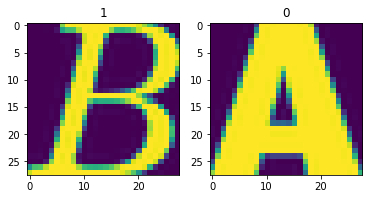

In [14]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

Let's start with layers. The main abstraction here is __`torch.nn.Module`__

In [16]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super(Model, self).__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    :ivar training: Boolean represents whether this module is in training or
                    evaluation mode.
    :vartype training: bool
    


There's a vast library of popular layers and architectures already built for ya'.

This is a binary classification problem, so we'll train a __Logistic Regression with sigmoid__.
$$P(y_i | X_i) = \sigma(W \cdot X_i + b) ={ 1 \over {1+e^{- [W \cdot X_i + b]}} }$$


In [17]:
# create a network that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit.
model.add_module('l1', nn.Linear(784, 1))

# add softmax activation for probabilities. Normalize over axis 1
# note: layer names must be unique
model.add_module('l2', nn.Sigmoid())

In [18]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [19]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.float32)

# compute outputs given inputs, both are variables
y_predicted = model(x)[:, 0]

y_predicted  # display what we've got

tensor([0.3640, 0.6887, 0.4514], grad_fn=<SelectBackward0>)

Let's now define a loss function for our model.

The natural choice is to use binary crossentropy (aka logloss, negative llh):
$$ L = {1 \over N} \underset{X_i,y_i} \sum - [  y_i \cdot log P(y_i | X_i) + (1-y_i) \cdot log (1-P(y_i | X_i)) ]$$
Your task is to implement crossentropy loss __manually__ without using `torch.nn.functional`. 



In [21]:
crossentropy = - (y * torch.log(y_predicted) + (1 - y) * torch.log(1 - y_predicted))

loss =  crossentropy.mean()

assert tuple(crossentropy.size()) == (
    3,), "Crossentropy must be a vector with element per sample"
assert tuple(loss.size()) == tuple(
), "Loss must be scalar. Did you forget the mean/sum?"
assert loss.data.numpy() > 0, "Crossentropy must non-negative, zero only for perfect prediction"
assert loss.data.numpy() <= np.log(
    3), "Loss is too large even for untrained model. Please double-check it."

__Note:__ you can also find crossentropy loss in `torch.nn.functional`, just type __`F.<tab>`__. However, it operates on raw logits instead of probabilities.

__Torch optimizers__

When we trained Linear Regression above, we had to manually .zero_() gradients on both our variables. Imagine that code for a 50-layer network.

Again, to keep it from getting dirty, there's `torch.optim` module with pre-implemented algorithms:

In [22]:
opt = torch.optim.RMSprop(model.parameters(), lr=0.01)

# here's how it's used:
loss.backward()      # add new gradients
opt.step()           # change weights
opt.zero_grad()      # clear gradients

In [23]:
# dispose of old variables to avoid bugs later
del x, y, y_predicted, loss, y_pred

### Putting it all together

In [24]:
# create network again just in case
model = nn.Sequential()
model.add_module('first', nn.Linear(784, 1))
model.add_module('second', nn.Sigmoid())

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [27]:
history = []

for i in range(100):

    # sample 256 random images
    ix = np.random.randint(0, len(X_train), 256)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
    y_batch = torch.tensor(y_train[ix], dtype=torch.float32)

    # predict probabilities
    y_predicted =  model(x_batch)[:, 0]

    assert y_predicted.dim(
    ) == 1, "did you forget to select first column with [:, 0]"

    # compute loss, just like before
    loss =  - (y_batch * torch.log(y_predicted) + (1 - y_batch) * torch.log(1 - y_predicted)).mean()

    # compute gradients
    loss.backward()

    # Adam step
    opt.step()

    # clear gradients
    opt.zero_grad()

    history.append(loss.data.numpy())

    if i % 10 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = 0.672
step #10 | mean loss = 0.364
step #20 | mean loss = 0.221
step #30 | mean loss = 0.175
step #40 | mean loss = 0.138
step #50 | mean loss = 0.126
step #60 | mean loss = 0.119
step #70 | mean loss = 0.128
step #80 | mean loss = 0.110
step #90 | mean loss = 0.103


__Debugging tips:__
* make sure your model predicts probabilities correctly. Just print them and see what's inside.
* don't forget _minus_ sign in the loss function! It's a mistake 99% ppl do at some point.
* make sure you zero-out gradients after each step. Srsly:)
* In general, pytorch's error messages are quite helpful, read 'em before you google 'em.
* if you see nan/inf, print what happens at each iteration to find our where exactly it occurs.
  * If loss goes down and then turns nan midway through, try smaller learning rate. (Our current loss formula is unstable).


### Evaluation

Let's see how our model performs on test data

In [31]:
# use your model to predict classes (0 or 1) for all test samples
predicted_y_test =  (model(torch.tensor(X_test))[:, 0] > 0.5).cpu().detach().numpy()

assert isinstance(predicted_y_test, np.ndarray), "please return np array, not %s" % type(
    predicted_y_test)
assert predicted_y_test.shape == y_test.shape, "please predict one class for each test sample"
assert np.in1d(predicted_y_test, y_test).all(), "please predict class indexes"

accuracy = np.mean(predicted_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.95, "try training longer"

Test accuracy: 0.97012


## More about pytorch:
* Using torch on GPU and multi-GPU - [link](http://pytorch.org/docs/master/notes/cuda.html)
* More tutorials on pytorch - [link](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* Pytorch examples - a repo that implements many cool DL models in pytorch - [link](https://github.com/pytorch/examples)
* Practical pytorch - a repo that implements some... other cool DL models... yes, in pytorch - [link](https://github.com/spro/practical-pytorch)
* And some more - [link](https://www.reddit.com/r/pytorch/comments/6z0yeo/pytorch_and_pytorch_tricks_for_kaggle/)

```

```

```

```

```

```

```

```

```

```